In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing_data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
# checking for categorical variables
df.select_dtypes(exclude=['number']).shape

(506, 0)

In [5]:
df_x = df.drop(columns='MEDV')
df_y = df["MEDV"]

In [6]:
# standardizing dataset
mean = df_x.mean()
std = df_x.std()
df_x = (df_x-mean)/std
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [7]:
features = df_x.to_numpy()
features

array([[-0.41936693,  0.28454827, -1.28663623, ..., -1.45755797,
         0.44061589, -1.07449897],
       [-0.41692667, -0.48724019, -0.59279438, ..., -0.3027945 ,
         0.44061589, -0.49195252],
       [-0.416929  , -0.48724019, -0.59279438, ..., -0.3027945 ,
         0.39603507, -1.20753241],
       ...,
       [-0.41303783, -0.48724019,  0.11562398, ...,  1.17530274,
         0.44061589, -0.98207574],
       [-0.40736095, -0.48724019,  0.11562398, ...,  1.17530274,
         0.40282626, -0.86444617],
       [-0.41458988, -0.48724019,  0.11562398, ...,  1.17530274,
         0.44061589, -0.66839688]])

In [8]:
len(features)

506

In [9]:
len(features[:,0])

506

In [10]:
def find_mse(y_true,y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [11]:
def LinearRegressionModel(X,y):
    # adding a column of bias to feature dataset
    ones = np.array([1 for i in range(len(X[:,0]))])
    ones = ones.reshape(len(X[:,0]),1)
    X = np.concatenate((ones,X),axis=1)
    
    # finding theta's using normal equation
    X_T = X.T
    X_TX = X_T.dot(X)
    theta = np.linalg.inv(X_TX).dot(X_T).dot(y)
    
    return theta

## ```Greedy forward feature selection```

In [12]:
selected_indexes = []
mse_by_features = []
X = []

for i in range(len(features[0])):
    mse_arr = []
    for j in range(len(features[0])):
        if j in selected_indexes:
            continue
        
        # for first time when X is empty
        if type(X) == list:
            X = features[:,j].reshape(len(features[:,0]),1)
        else:
            # now every row of X will be a datapoint with num number of columns as features
            X = np.concatenate((X,features[:,j].reshape(len(features[:,0]),1)),axis=1)
        
        # applying linear regression on this
        split_len = int(0.8*len(X))
        
        # training regression model
        x_train = X[:split_len]
        y_train = df_y[:split_len]
        x_test = X[split_len:]
        y_test = df_y[split_len:]
        
        theta = LinearRegressionModel(x_train,y_train)
        
        # y_predicted
        # adding bias col to x_test
        ones = np.array([1 for i in range(len(x_test[:,0]))])
        ones = ones.reshape(len(x_test[:,0]),1)
        x_test = np.concatenate((ones,x_test),axis=1)
        
        y_pred = x_test.dot(theta)
        
        mse = find_mse(y_test,y_pred)
        mse_arr.append((j,mse))
        
        # dropping the col we added jth column
        if(len(X[0]) > 1):
            X = X[:,:len(X[0])-1]
        else:
            X = []
            
    index = 0
    min_val = float('inf')
    for s in mse_arr:
        if(s[1] < min_val):
            min_val = s[1]
            index = s[0]

    selected_indexes.append(index)
    mse_by_features.append(min_val)

    # means no feature is there initially
    if type(X) == list:
         X = features[:,index].reshape(features.shape[0],1)
    else:
         X = np.concatenate((X,features[:,index].reshape(features.shape[0],1)),axis=1)


In [13]:
selected_indexes

[12, 10, 3, 1, 9, 2, 4, 7, 0, 6, 8, 11, 5]

In [14]:
mse_by_features

[22.99311505641551,
 16.402544728980175,
 16.35402242937406,
 16.424845490060274,
 16.542924913453845,
 16.602495094773815,
 16.85884469484197,
 16.422916751179244,
 15.688668742019988,
 16.4132115685501,
 18.563091754109802,
 16.613653087777575,
 32.79986268020723]

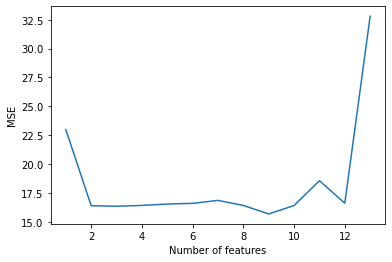

In [15]:
plt.plot(range(1,len(mse_by_features)+1),mse_by_features)
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.show()

In [16]:
#selecting featues till min mse
#find min index
index = 0
min_val = float('inf')

for i in range(len(mse_by_features)):
    if(min_val > mse_by_features[i]):
        index = i
        min_val = mse_by_features[i]
        
    
column_names = [df.columns[i] for i in selected_indexes[:int(index)+1]]

In [17]:
column_names

['LSTAT', 'PTRATIO', 'CHAS', 'ZN', 'TAX', 'INDUS', 'NOX', 'DIS', 'CRIM']

In [18]:
features = df_x.copy()

In [19]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


## ```Greedy backward feature selection```

In [20]:
from sklearn.linear_model import LinearRegression

removed_features = []
mse_list = []
mse_arr = []
X = features.copy()

for i in range(len(X.columns)):
    if(len(X.columns) <= 1):
        break
        
    for col in features.columns:
        if col in removed_features:
            continue
        
        temp = X[col].copy()
        X = X.drop([col],axis=1)
        df_y = pd.DataFrame(df_y)
        
        # training regression model
        x_train = X[:split_len]
        y_train = df_y[:split_len]
        x_test = X[split_len:]
        y_test = df_y[split_len:]
        
        
        model = LinearRegression()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        
        mse = find_mse(y_test,y_pred)
        mse = float(mse.iloc[0])
        mse_arr.append((col,mse))
        
        X = pd.concat([X,temp],axis=1)
        
    
    column = ""
    min_val = float('inf')
    

    for u in mse_arr:
        if(u[1] < min_val):
            min_val =  u[1]
            column = u[0]
            
    removed_features.append(column)
    mse_list.append(float(min_val))
    X = X.drop([column],axis = 1)
    mse_arr = []

In [21]:
X = df.copy()
min_val = float('inf')
column = []
index = 0

for i,val in enumerate(mse_list):
    if(val < min_val):
        min_val = val
        index = i
        
for j in range(0,index+1):
    column.append(removed_features[j])
    
X = features.drop(column,axis=1)
X.shape,column,len(column),mse

((506, 10), ['RM', 'TAX', 'AGE'], 3, 47.89377827155704)

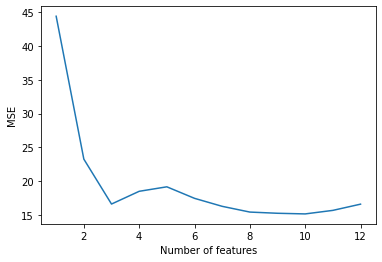

In [22]:
plt.plot(range(1,len(mse_list)+1),mse_list[::-1])
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.show()